In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
unif = np.random.default_rng().uniform


## 1 Generar uniforme S $\subseteq$ [0,1]x[0,1]

In [81]:
def S(n):
    x = unif(0, 1, size=n).reshape(-1,1)
    y = unif(0, 1, size=n).reshape(-1,1)
    return np.concatenate((x,y), axis=1)

In [ ]:
points = S(100)

## 2 Calcular c

In [129]:
def phi(x,psi):
    return psi*((x.flatten()[0])**2+(x.flatten()[1])**2)

def f(x, S, psi, c):
    suma = 0
    for s in S:
        suma += np.exp(-phi(x-s,psi))
    return suma/c

def grid(k):
    l = np.linspace(0.05,0.95,num=k)
    xv, yv = np.meshgrid(l,l)
    grid = np.concatenate((xv.reshape(-1,1),yv.reshape(-1,1)),axis=1)
    return grid, xv, yv

def constant(mesh, points, psi):
    _ = 0
    for x in mesh:
        _ += f(x,points,psi,1)/k
    return _

In [139]:
grid_n = 50
mesh, xv, yv = grid(grid_n)

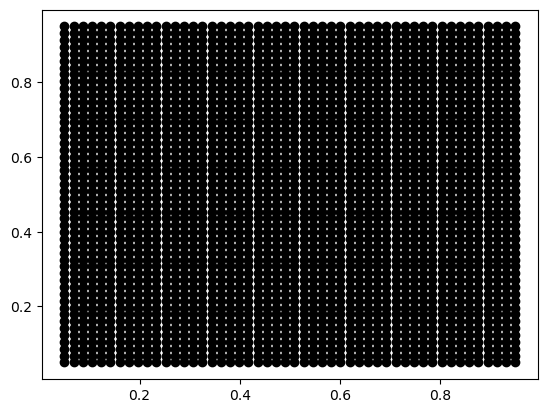

In [140]:
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

In [165]:
n=50
psi = 1/0.05
points = S(n)
c = constant(mesh, points, psi)

In [166]:
c

1695.5051403571576

## 3 Aceptación rechazo

In [167]:
def acep_rec(M, f, g, S, psi, c):
    flag = True
    while flag:
        y = unif(0,1,size=2).reshape(1,-1)
        u = unif(0,1)
        if u <= f(y, S, psi, c)/(M*g(y)):
            flag = False
    return y

In [168]:
def g(x):
    return 1


In [169]:
x = acep_rec(10,f,g,points,psi,c)

In [188]:
simulated_points = []
for i in range(100):
    simulated_points.append(acep_rec(10,f,g,points,psi,c))

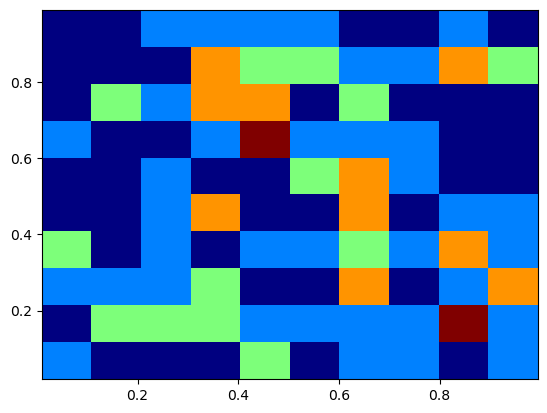

In [190]:
plt.hist2d(np.asarray(simulated_points).reshape(-1,2)[:,0],np.asarray(simulated_points).reshape(-1,2)[:,1], bins=(10, 10), cmap=plt.cm.jet)
plt.show()